Saving spotify.csv to spotify.csv


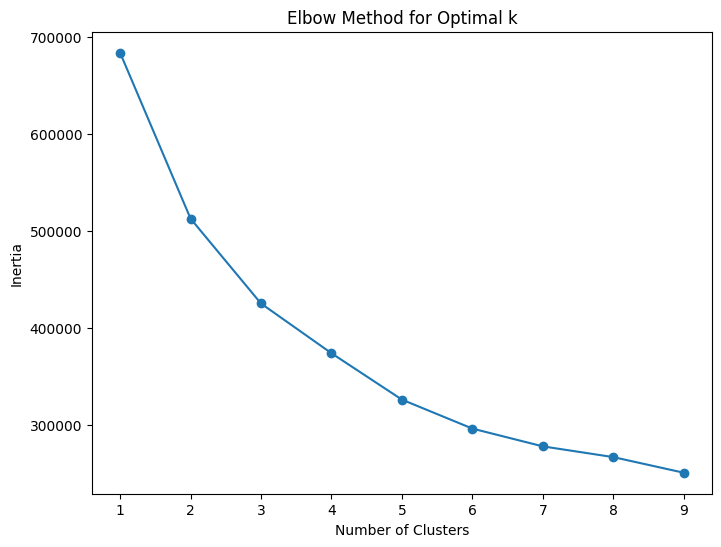

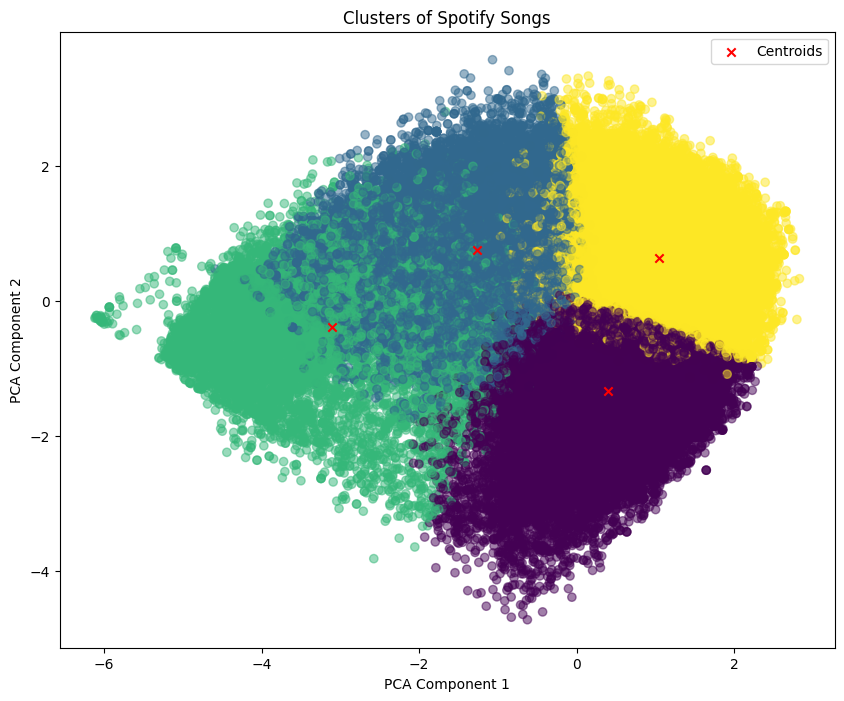

Clustered dataset saved as 'spotify_clustered.csv'


In [1]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

uploaded = files.upload()

df = pd.read_csv('spotify.csv')

features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']
df_clean = df.dropna(subset=features)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[features])

inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
reduced_centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df_clean['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], color='red', marker='x', label='Centroids')
plt.title('Clusters of Spotify Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

df_clean.to_csv('spotify_clustered.csv', index=False)
print("Clustered dataset saved as 'spotify_clustered.csv'")
